In [3]:
# ========================================
# FILE: split_model_datasets.py
# Description: Clean and split dataset for Normal vs Spike modeling
# ========================================

import pandas as pd
import numpy as np # Import numpy for np.nan

# Load files (make sure they are in the same folder)
df_main = pd.read_excel("data_v1_15june.xlsx")
df_event = pd.read_excel("ammonia_event_only.xlsx")

# Convert 'timestamp' columns to datetime objects
# This is crucial for using the .dt accessor later
df_main["timestamp"] = pd.to_datetime(df_main["timestamp"])
df_event["timestamp"] = pd.to_datetime(df_event["timestamp"])

# -------------------------
# Clean df_main (normal)
# -------------------------
df_main_clean = df_main.dropna(subset=["ammonia", "humidity", "temperature", "iaq"])
# Fill missing 'visitor' values using forward fill, then backward fill for any remaining NaNs at the beginning
df_main_clean["visitor"] = df_main_clean["visitor"].fillna(method='ffill').fillna(method='bfill')
# Extract day name from timestamp
df_main_clean["day"] = df_main_clean["timestamp"].dt.day_name()
# Extract hour from timestamp
df_main_clean["hour"] = df_main_clean["timestamp"].dt.hour
# Calculate daily max visitor count for each date
df_main_clean["daily_visitor"] = df_main_clean.groupby(df_main_clean["timestamp"].dt.date)["visitor"].transform("max")
# Drop the original 'visitor' column as 'daily_visitor' is now used
df_main_clean = df_main_clean.drop(columns=["visitor"])

# -------------------------
# Clean df_event (spike/sewer event)
# -------------------------
# Check if 'visitor' column exists in df_event before proceeding
if 'visitor' not in df_event.columns:
    print("⚠️ Warning: 'visitor' column not found in 'ammonia_event_only.xlsx'. Adding it with default NaN values.")
    df_event['visitor'] = np.nan # Add the column filled with NaN if it's missing

# Remove extreme spikes where ammonia is above 50, and create a copy to avoid SettingWithCopyWarning
df_event_clean = df_event[df_event["ammonia"] <= 50].copy()
# Fill missing 'visitor' values using forward fill, then backward fill for any remaining NaNs at the beginning
df_event_clean["visitor"] = df_event_clean["visitor"].fillna(method='ffill').fillna(method='bfill')
# Extract day name from timestamp
df_event_clean["day"] = df_event_clean["timestamp"].dt.day_name()
# Extract hour from timestamp
df_event_clean["hour"] = df_event_clean["timestamp"].dt.hour
# Calculate daily max visitor count for each date
df_event_clean["daily_visitor"] = df_event_clean.groupby(df_event_clean["timestamp"].dt.date)["visitor"].transform("max")
# Drop the original 'visitor' column as 'daily_visitor' is now used
df_event_clean = df_event_clean.drop(columns=["visitor"])

# -------------------------
# Save both cleaned datasets
# -------------------------
df_main_clean.to_csv("dataset_model_normal_only.csv", index=False)
df_event_clean.to_csv("dataset_model_spike_only.csv", index=False)

print("✅ Normal-only dataset saved as 'dataset_model_normal_only.csv'")
print("✅ Spike-only dataset saved as 'dataset_model_spike_only.csv'")


C:\Users\atinh\AppData\Local\Temp\ipykernel_11584\1082961661.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_main_clean["visitor"] = df_main_clean["visitor"].fillna(method='ffill').fillna(method='bfill')
C:\Users\atinh\AppData\Local\Temp\ipykernel_11584\1082961661.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_clean["visitor"] = df_main_clean["visitor"].fillna(method='ffill').fillna(method='bfill')
C:\Users\atinh\AppData\Local\Temp\ipykernel_11584\1082961661.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

⚠️ Warning: 'visitor' column not found in 'ammonia_event_only.xlsx'. Adding it with default NaN values.
✅ Normal-only dataset saved as 'dataset_model_normal_only.csv'
✅ Spike-only dataset saved as 'dataset_model_spike_only.csv'


C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\nn.py:827: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


944/944 ━━━━━━━━━━━━━━━━━━━━ 59s 57ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 55s 58ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 59s 62ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 57s 60ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 58s 6

C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\nn.py:827: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


2360/2360 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     75500

    accuracy                           1.00     75500
   macro avg       1.00      1.00      1.00     75500
weighted avg       1.00      1.00      1.00     75500


Confusion Matrix:


C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


[[75500]]


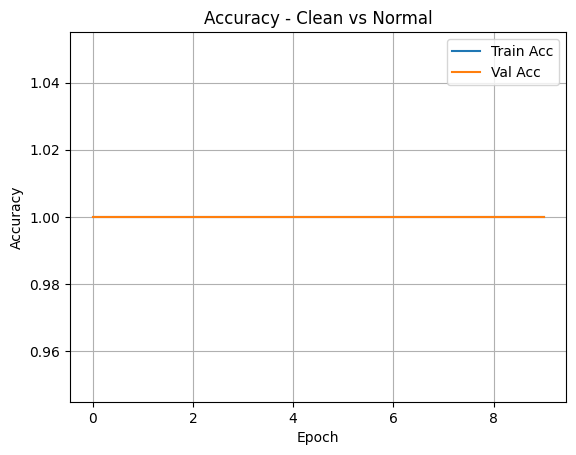

✅ Saved model as cnn_lstm_model_normal.h5


In [4]:

# ========================================
# FILE: cnn_lstm_model_normal.py
# Description: CNN-LSTM model for normal data (Clean/Normal classification)
# ========================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load cleaned normal dataset
df = pd.read_csv("dataset_model_normal_only.csv")

# Assign basic cleanliness labels (adjust rules if needed)
def classify_normal(row):
    if row['ammonia'] <= 0.5 and row['iaq'] >= 30000:
        return "Clean"
    else:
        return "Normal"

df["cleanliness_level"] = df.apply(classify_normal, axis=1)

# Encode labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["cleanliness_level"])
label_names = label_encoder.classes_

# Scale input features
features = ["ammonia", "humidity", "temperature", "iaq", "hour", "daily_visitor"]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[features])

# Create sequences
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled)):
    X.append(scaled[i-sequence_length:i])
    y.append(df["label"].iloc[i])

X = np.array(X)
y = np.array(y)
y_cat = to_categorical(y)

# Build CNN-LSTM model
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_cat.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X, y_cat, epochs=10, batch_size=64, validation_split=0.2)

# Predict and evaluate
y_pred_prob = model.predict(X)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=label_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

# Plot accuracy
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy - Clean vs Normal")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Save model
model.save("cnn_lstm_model_normal.h5")
print("✅ Saved model as cnn_lstm_model_normal.h5")


C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 391ms/step - accuracy: 0.4253 - loss: 0.6932 - val_accuracy: 0.0000e+00 - val_loss: 0.6935
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4922 - loss: 0.6932 - val_accuracy: 1.0000 - val_loss: 0.6917
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5061 - loss: 0.6931 - val_accuracy: 1.0000 - val_loss: 0.6906
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.4827 - loss: 0.6932 - val_accuracy: 1.0000 - val_loss: 0.6896
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5139 - loss: 0.6930 - val_accuracy: 1.0000 - val_loss: 0.6884
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5608 - loss: 0.6926 - val_accuracy: 1.0000 - val_loss: 0.6869
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4827 - loss: 0.6934 - val_accuracy: 1.0000 - val_loss: 0.6860
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4749 - loss: 0.6935 - val_accuracy: 1.0000 - val_loss: 0.

C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

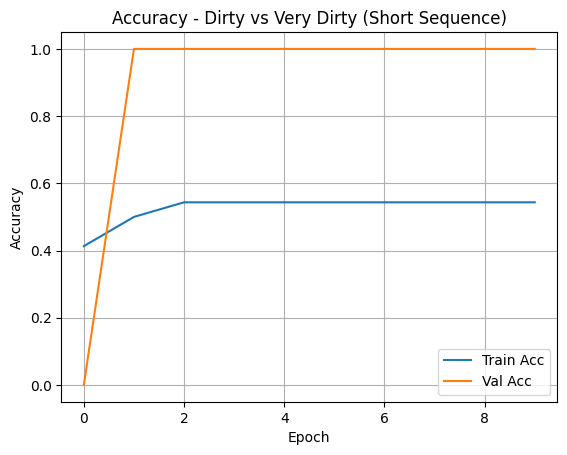

✅ Saved model as cnn_lstm_model_spike_short_seq.h5


In [1]:

# ========================================
# FILE: cnn_lstm_model_spike_short_seq.py
# Description: CNN-LSTM model for spike data with short sequence (5)
# ========================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load cleaned spike dataset
df = pd.read_csv("dataset_model_spike_only_FIXED.csv")

# Assign cleanliness labels based on ammonia/IAQ
def classify_spike(row):
    if row['ammonia'] > 4.0 or row['iaq'] < 5000:
        return "Very Dirty"
    else:
        return "Dirty"

df["cleanliness_level"] = df.apply(classify_spike, axis=1)

# Encode labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["cleanliness_level"])
label_names = label_encoder.classes_

# Scale input features
features = ["ammonia", "humidity", "temperature", "iaq", "hour", "daily_visitor"]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[features])

# Create shorter sequences (length = 5)
sequence_length = 5
X, y = [], []
for i in range(sequence_length, len(scaled)):
    X.append(scaled[i-sequence_length:i])
    y.append(df["label"].iloc[i])

X = np.array(X)
y = np.array(y)
y_cat = to_categorical(y)

# Build CNN-LSTM model
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_cat.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X, y_cat, epochs=10, batch_size=16, validation_split=0.2)

# Predict and evaluate
y_pred_prob = model.predict(X)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=label_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

# Plot accuracy
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy - Dirty vs Very Dirty (Short Sequence)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Save model
model.save("cnn_lstm_model_spike_short_seq.h5")
print("✅ Saved model as cnn_lstm_model_spike_short_seq.h5")


In [2]:
#dashboard for the test 2 
# no iot ingrate yet 

In [ ]:

# ========================================
# FILE: toilet_dashboard_scheduler_demo_v2.py
# Description: Final Streamlit Dashboard for Toilet ML V2 with Hybrid Reasoning
# ========================================

import streamlit as st
import pandas as pd
import numpy as np
import datetime
import os
from tensorflow.keras.models import load_model

st.set_page_config(page_title="Toilet ML Dashboard V2", layout="wide")
st.sidebar.title("🚻 Toilet Monitoring Menu")
page = st.sidebar.radio("Go to:", [
    "1️⃣ Real Mode (Live Schedule)",
    "2️⃣ Real Mode - Manual Trigger",
    "3️⃣ Accelerated Schedule (Testing Mode)",
    "4️⃣ Demo Mode (Manual Input)",
    "5️⃣ Janitor Mode (Log & Actions)"
])

try:
    model_normal = load_model("cnn_lstm_model_normal.h5")
    model_spike = load_model("cnn_lstm_model_spike_short_seq.h5")
except:
    model_normal = None
    model_spike = None
    st.sidebar.warning("⚠️ Model not found. Please upload model files.")

if page == "1️⃣ Real Mode (Live Schedule)":
    st.header("📡 Real Mode - Live Monitoring")
    st.info("Coming soon: Live stream from IoT sensor + real-time ML prediction.")

elif page == "2️⃣ Real Mode - Manual Trigger":
    st.header("🔘 Real Mode - Manual Trigger")
    if st.button("📥 Load Latest Sensor Data"):
        st.success("✅ Simulated sensor data loaded!")
    if st.button("🚀 Run Hygiene Prediction"):
        st.warning("⚙️ Prediction logic coming soon...")

elif page == "3️⃣ Accelerated Schedule (Testing Mode)":
    st.header("⏩ Accelerated Testing Mode")
    uploaded_file = st.file_uploader("📂 Upload historical dataset (CSV)", type=["csv"])
    if uploaded_file:
        df = pd.read_csv(uploaded_file)
        st.dataframe(df.head())
        st.success("✅ Data preview loaded.")

elif page == "4️⃣ Demo Mode (Manual Input)":
    st.header("🧪 Demo Mode - Manual Parameter Input")
    ammonia = st.slider("Ammonia (ppm)", 0.0, 50.0, 1.0)
    humidity = st.slider("Humidity (%)", 30.0, 100.0, 60.0)
    temperature = st.slider("Temperature (°C)", 20.0, 40.0, 30.0)
    iaq = st.slider("Gas Resistance / IAQ (Ω)", 0, 50000, 25000)
    visitor = st.slider("Daily Visitor Count", 0, 5000, 2000)
    hour = st.slider("Hour (0-23)", 0, 23, 12)

    features = np.array([[ammonia, humidity, temperature, iaq, hour, visitor]])
    features_scaled = features  # Add scaler if used in training

    st.subheader("🔍 Prediction Output:")
    if st.button("🚀 Predict Cleanliness"):
        prediction_text = ""
        confidence = 0.0

        if ammonia < 1.5 and iaq > 10000:
            if model_normal:
                result = model_normal.predict(features_scaled)
                label = np.argmax(result)
                confidence = float(np.max(result)) * 100
                final_label = ["Clean", "Normal"][label]
                prediction_text = f"🧼 Prediction: {final_label} ({confidence:.2f}%)"
        else:
            if model_spike:
                result = model_spike.predict(features_scaled.reshape(1, 5, 6))
                label = np.argmax(result)
                confidence = float(np.max(result)) * 100
                final_label = ["Dirty", "Very Dirty"][label]
                prediction_text = f"🚨 Prediction: {final_label} ({confidence:.2f}%)"

        st.success(prediction_text)

elif page == "5️⃣ Janitor Mode (Log & Actions)":
    st.header("🧹 Janitor Mode - Logging & Actions")
    if st.button("✅ Mark as Cleaned"):
        now = datetime.datetime.now()
        log = f"Cleaned at {now.strftime('%Y-%m-%d %H:%M:%S')}"
        st.success(log)
        with open("cleaning_log.txt", "a") as f:
            f.write(log + "\n")
    st.write("📄 Cleaning history:")
    if os.path.exists("cleaning_log.txt"):
        with open("cleaning_log.txt", "r") as f:
            logs = f.readlines()
        for line in logs[-5:]:
            st.text(line.strip())
    else:
        st.info("No cleaning logs yet.")
